(extremy)=
# Hledání extrémů funkcí

V této kapitole si představíme několik metod na hledání extrémů funkcí jedné nebo více proměnných. Jak uvidíme, tyto metody budou založené na podobných principech jako metody v předchozí kapitole. Také, podobně jako v minulé kapitole, zde neexistuje žádná nejlepší obecná metoda. Každá z představených metod má svoje výhody a naopak limitace, proto v různých situacích může výt výhodné použít různé metody.

Uvažujeme funkci $f$ a budeme hledat její minimu (hledání maxima je stejná opět hledání minima, akorát pro funkci $-f$). Budeme rozlišovat mezi **lokálním** a **globálním** minimem. Hledání globálního maxima (podobně jako řešení nelineární rovnice) je obecně *obtížný* problém. Metody, které si zde představíme, dokáží nalézt (zkonvergovat) pouze lokální extrém a vyžadují nějaký počáteční odhad.

Pro hledání globálního minima existuje několik postupů (z nichž jeden bude součástí zápočtové úlohy z této hodiny):
* Spustění metody na hledání lokálního minima z mnoha náhodných počátečných bodů.
* Perturbace lokálního minima o krok konečné délky a pozorování, zda nás metoda hledání lokálního minima vrátí do stejného bodu.
* Metoda simulovaného žíhání (*simulated annealing*) - umožníme udělat krok "nahoru" s nenulovou pravděpodobností, kterou postupně snižujeme -> na začátku prozkoumáváme "terén" a poté zamíříme k extrému, ODKAZY: [cvičení - Problém obchodního cestujícího](https://youtu.be/NhSHKzOeD1o?si=Xu1OusUnSYRvkZfr), [animace](https://www.youtube.com/watch?v=iaq_Fpr4KZc)

Hledání extrémů funkcí je problém analogický optimalizačním úlohám, kde funkce $f$ vyjadřuje například *chybu* nebo *přesnost* nějakého modelu.
Příklady optimalizačních úloh:
* Metoda nejmenších čtverců - minimalizace funkcionálu $S = \sqrt{\sum_{i=1}^{n}w_{i}\left[y_{i} - \tilde{f}(x_{i})\right]^{2}}$
    - [viz 1. část cvičení](https://mjirka.github.io/nme/Cviceni06vyplnene.html) - pro polynomiální funkce lze převést na řešení soustavy lineáních rovnic, pro složitější funkce je potřeba použít jiné *optimalizační metody*
* Neuronové sítě - učení s učitelem, optimalizace **účelové funkce** (loss function)

Zde si hledání extrémů ukážeme na jednoduchém příkladu funkcí, u kterých je snadné najít extrém analyticky pomocí vyjádření derivace, položení nule a vyřešení rovnice. V praxi se tyto metody používají na **optimalizační úlohy**, ve kterých nemáme analytický předpis dané funkce. Navíc může být výpočetně náročné spočítat funkční hodnoty nebo naopak není snadné spočítat derivaci funkce (i numericky). Proto lze rozdělit metody na dvě skupiny:
* Metody využívající pouze výpočet funkční hodnoty.
* Metody, které počítají jak funkční hodnoty tak derivace - typicky mocnější, ale na úkor výpočtu derivací.

U metod nás bude dále zajímat:
* *rychlost konvergence* - počet kroků potřebných k dosažený požadovené přesnosti

Naimportujeme si knihovny potřebné pro následující příklady:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg, optimize

## Hledání extrémů funkce jedné proměnné

V případě hledání minima funkce jedné proměnné (1D minimalizace) můžeme opět využít předem známého ohraničení minima. Druhý způsob využívá výpočet derivace k určení směru, kterým se vydat k přiblížení se minimu.

První dvě metody využívají znalosti ohraničení.

**Ohraničení minima**

Jak získat počáteční ohraničení minima? Existuje jednoduchá metoda, jak takové ohraničení nalézt:
1. začněme z bodu $a$, $f(a)$
2. s konečným, postupně se zvětšujícím krokem postupujeme směrem "dolů" - máme $b$, $f(b)$
3. jakmile nastane pro další bod: $f(c) > f(b)$, máme ohraničení minima body $a, b, c$

**Hledání minima**

Dále budeme předpokládat, že již ohraničení máme a budeme se soustředit na jednotlivé metody.
- Pro ohraničení minima/maxima musíme znát hodnoty funkce ve třech bodech $a, b, c$
- Budeme se zabývat hledáním minima
- Nechť

$$
a < b < c \wedge f(a) > f(b) < f(c),
$$

pak existuje minimum funkce $f(x)$ na intervalu $(a,c)$.
- Ke zúženı́ intervalu ohraničujı́cı́ho minimum potřebujeme **čtvrtý** bod

Následující metody aplikujeme na jednoduchou funkci s ohraničením $(a, b, c) = (-5, -1, 5)$:

$$
f(x) = 3 \sin(x + 2) + x^2 - 3x + 5
$$

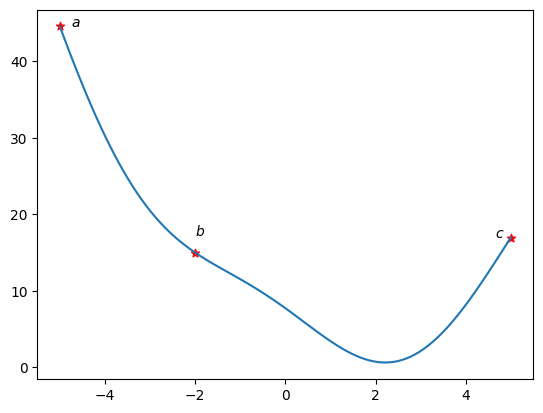

In [2]:
def f(x):
    return 3*np.sin(x + 2) + x**2 - 3*x + 5  # zkusit zmenit na 8*sin(x+2) ...

a = -5
b = -2
c = 5
x = np.linspace(a, c, 100)

plt.plot(x, f(x))
plt.scatter([a, b, c], [f(a), f(b), f(c)], c='r', marker='*')
plt.text(a*0.95,f(a),'$a$')
plt.text(b,f(b)*1.15,'$b$')
plt.text(c*0.93,f(c),'$c$');

### Metoda zlatého řezu

Podobně jako u *metody bisekce* nejjednoduší způsob změnšování intervalu, tedy ohraničení minima, lze provádět dělením tentokrát jednoho z podintervalů $(a, b)$ nebo $(b, c)$.

Naivní postup (ala *bisekce*):
1. rozdělení intervalu $(b, c)$ napůl bodem $d$
2. pokud $f(d) < f(b)$ -> nové ohraničení $(b, d, c)$
3. pokud $f(d) > f(b)$ -> nové ohraničení $(a, b, d)$

Metoda zlatého řezu (viz přednáška):

![metoda zlateho rezu](../images/zlatyRez.png)

1. Chceme, aby se interval zmenšil o stejný poměr v obou případech.
    - bod $d$ zvolíme jako *zrcadlový* obraz bodu $b$ okolo středu intervalu $(a, c)$
2. Jaký by měl bý počáteční poměr, aby byla konvergence co nejrychlejší?
    - z podobnosti následujících kroků lze odvodit (viz přednáška), že ideální poměr je roven **zlatému řezu**:
$
W = \dfrac{3-\sqrt{5}}{2} \approx 0.38197
$
    - tedy, vzdálenost čtvrtého bodu od krajů je v poměru [zlatého řezu](https://www.mathsisfun.com/numbers/nature-golden-ratio-fibonacci.html): 

$$
d=a + \dfrac{3-\sqrt{5}}{2}(c-a)
$$

V každém kroce máme zajištěno, že změnšíme velikost ohraničení přávě o $0.38197$. Tedy velikost nového intervalu bude tvořit $0.61803$ původní velikosti (u *bisekce* jsme měli $0.5$!).

Vlastnosti metody:
* *lineární* konvergence - s jedním krokem metody se přesnost zvýší o jednu číslici
* vhodná pro případy, kdy je **obtížné spočítat derivaci**, nebo je druhá derivace nespojitá - následující metody se nevyplatí

**Algoritmus metody zlatého řezu**

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Implementujte metodu *zlatého řezu* doplněním následujícího kódu.

Do pole `reseni` uložte vždy aktuální řešení a do pole `epsilon` odpovídající chybu v každé iteraci.
</p>
</div>
</div>

In [3]:
# nastavme presnost, se kterou chceme nalezt minimum
presnost = 1e-15

# pocatecni ohraniceni
a = -5
b = -2
c = 5

# ulozime si zlaty rez
zlatyRez = (3-np.sqrt(5))/2 # ~0.38

# napocteme optimalni pozici bodu b - leva cast intervalu (zahazujeme predchozi, neoptimalni hodnotu b!)
b = a + zlatyRez*(c-a)

# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon = [] # odhad chyby, tedy delku intervalu <a,c> v jednotlivych krocich
reseni = [] # aktualni odhad reseni

while True:
    if (c-a) < presnost: # skoncime, pokud je minimum urceno dostatecne presne
        break
    
    if (b-a)/(c-a) < 0.5: # b v leve casti -> d volime W krat od bodu c
        d = c - zlatyRez*(c-a) # 1-zlatyRez ~ 0.62
    else: # b v prave casti -> d volime W krat od bodu a
        d = b
        b = a + zlatyRez*(c-a)
        
    # nyni mame a < b < d < c, zjistime ve kterem intervalu je minimum
    if f(a) >= f(b) and f(b) <= f(d): # minimum je v intervalu < a,d >, ten navic obsahuje bod b
        c = d
    else: #minimum je v intervalu < b,c >, ten navic obsahuje bod d
        a = b
        b = d
    
    epsilon.append(c - a)
    reseni.append((a + c) / 2)

minimum = reseni[-1] # odhad konecneho reseni
chyba = epsilon[-1] # odhad konecne chyby

iteraci = len(reseni)
print('Minimum je v intervalu <',a,',',c,'>')

Minimum je v intervalu < 2.2153014081899682 , 2.215301408189969 >


Porovnání s výsledkem funkce `minimize_scalar(.., method="golden")` z knihovny SciPy:

In [4]:
min_SP = optimize.minimize_scalar(f, bracket=[-2.0, 0.0], tol=1.0e-15, method="golden").x

In [5]:
print("minimum:", minimum, "chyba:", chyba, "iteraci:", len(reseni))
print("minimum(SciPy):", min_SP)

minimum: 2.2153014081899687 chyba: 8.881784197001252e-16 iteraci: 76
minimum(SciPy): 2.2153013932353014


**Vizualizace nalezeného extrému**

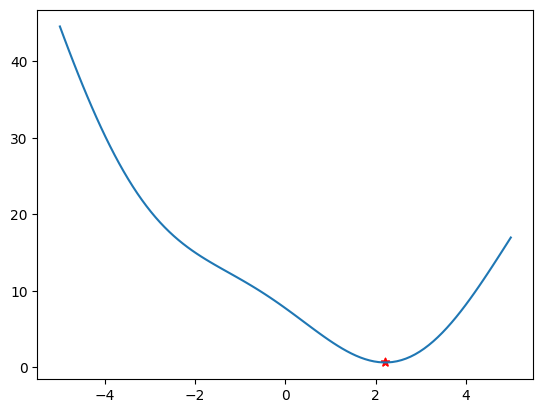

In [6]:
plt.plot(x, f(x))
plt.scatter([a, c], [f(a), f(c)], c='r', marker='*');

**Analýza konvergence**

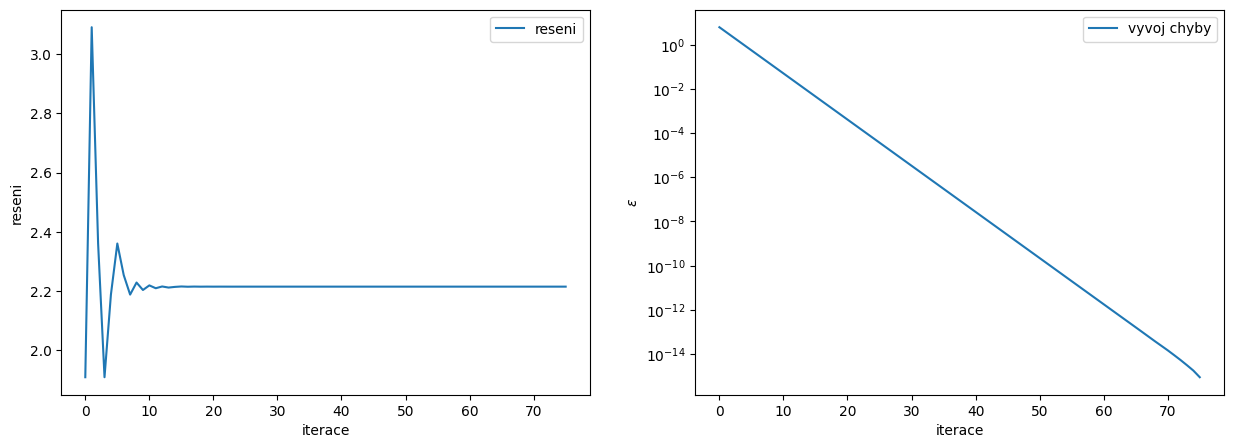

In [7]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci),reseni,label='reseni')
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci),epsilon,label='vyvoj chyby')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].set_yscale('log')
ax[1].legend();

### Metoda parabolické interpolace

![metoda parabolické interpolace](../images/parabInterp.png)

Postup metody:
1. máme ohraničení $(a, b, c)$
2. provedeme parabolickou interpolaci - proložení těchto tří hodnot parabolickou
3. spočítáme minimum paraboly pomocí: 

$$
d = b-\dfrac{1}{2}\dfrac{(b-a)^{2}[f(b)-f(c)]-(b-c)^{2}\left[f(b)-f(a)\right]}{(b-a)\left[f(b)-f(c)\right]-(b-c)\left[f(b)-f(a)\right]}
$$

4. určíme nové ohraničení, aby bylo splněno: 

$$
a < b < c \wedge f(a) > f(b) < f(c)
$$

Vlastnosti metody:
* vztah na výpočet bodu $d$ přestává fungovat, pokud leží body $a, b, c$ na jedné přímce (jmenovatel je nulový) -> metoda sama o sobě není robustní a nezajištuje konvergenci ve všech případech!!
    - Brentova metoda = kombinace parabolické interpolace a metody zlatého řezu (použita v případě, kdy je hodnota čitatele blízko nuly)
* rychlá konvergence
* stačí výpočet funkční hodnoty

**Algoritmus metody parabolické interpolace**

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Implementujte metodu *parabolické interpolace* doplněním následujícího kódu.

Do pole `reseni2` uložte vždy aktuální řešení a do pole `epsilon2` odpovídající chybu v každé iteraci.
</p>
</div>
</div>

In [8]:
# nastavme presnost, se kterou chceme nalezt minimum
presnost = 1e-9

# pocatecni ohraniceni
a = -5
b = -2
c = 5

# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon2 = [] # odhad chyby, tedy delku intervalu <a,c> v jednotlivych krocich
reseni2 = [] # aktualni odhad reseni

# hledani probiha v cyklu
while True:
    if (c-a) < presnost: # skoncime, pokud je minimum urceno dostatecne presne
        break
    
    # z a,b,c odhadneme polohu d minima paraboly, kterou jsme prolozili body
    # a,b,c
    d = b - 0.5*((b-a)**2*(f(b)-f(c))-(b-c)**2*(f(b)-f(a))) / ((b-a)*(f(b)-f(c))-(b-c)*(f(b)-f(a)))
    
    # zjistime, zda nastala situace a < d < b < c nebo a < b < d < c
    if d < b: # nastala situace a < d < b < c
        # zjistime, na kterem intervalu je minimum
        if f(a) > f(d) and f(d) < f(b): # minimum je na intervalu  < a,b > , ktery obsahuje bod d
            c = b
            b = d
        else: # minimum je na intervalu  < d,c > , ktery obsahuje bod b
            a = d
    else: # nastala situace a < b < d < c
        # zjistime, na kterem intervalu je minimum
        if f(a) > f(b) and f(b) < f(d): # minimum je na intervalu  < a,d >  obsahujicim bod b
            c = d
        else: # minimum je na intervalu  < b,c >  obsahujicim bod d
            a = b
            b = d
    
    epsilon2.append(c - a)
    reseni2.append((a + c) / 2)

minimum2 = reseni2[-1] # odhad konecneho reseni
chyba2 = epsilon2[-1] # odhad konecne chyby

iteraci2 = len(reseni2)
print('Minimum je v intervalu <',a,',',c,'>')

Minimum je v intervalu < 2.2153014123877957 , 2.215301413169725 >


Porovnání s výsledkem funkce `minimize_scalar(.., method="brent")` z knihovny SciPy (Brentova metoda kombinuje metodu zlatého řezu a parabolické interpolace):

In [9]:
min_SP2 = optimize.minimize_scalar(f, bracket=[-2.0, 0.0], tol=1.0e-15, method="brent").x

In [10]:
print("minimum:", minimum2, "chyba:", chyba2, "iteraci:", len(reseni2))
print("minimum(SciPy):", min_SP2)

minimum: 2.2153014127787602 chyba: 7.81929188065078e-10 iteraci: 11
minimum(SciPy): 2.2153014131075905


Srovnání výsledků různých metod:

In [11]:
print('Zlatý řez:    ', minimum, chyba, iteraci)  # predchozi vysledek
print('Parabola :    ', minimum2, chyba2, iteraci2)

Zlatý řez:     2.2153014081899687 8.881784197001252e-16 76
Parabola :     2.2153014127787602 7.81929188065078e-10 11


**Vizualizace nalezeného extrému**

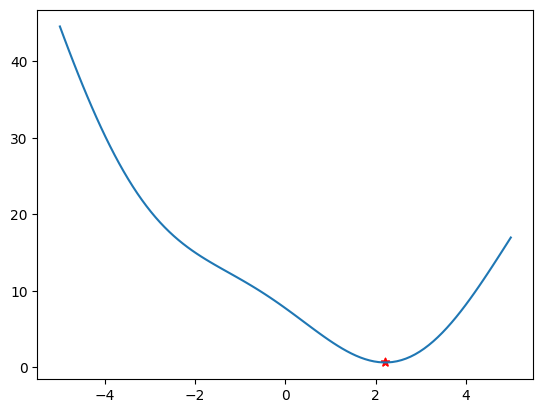

In [12]:
plt.plot(x, f(x))
plt.scatter([a, c], [f(a), f(c)], c='r', marker='*');

**Analýza konvergence**

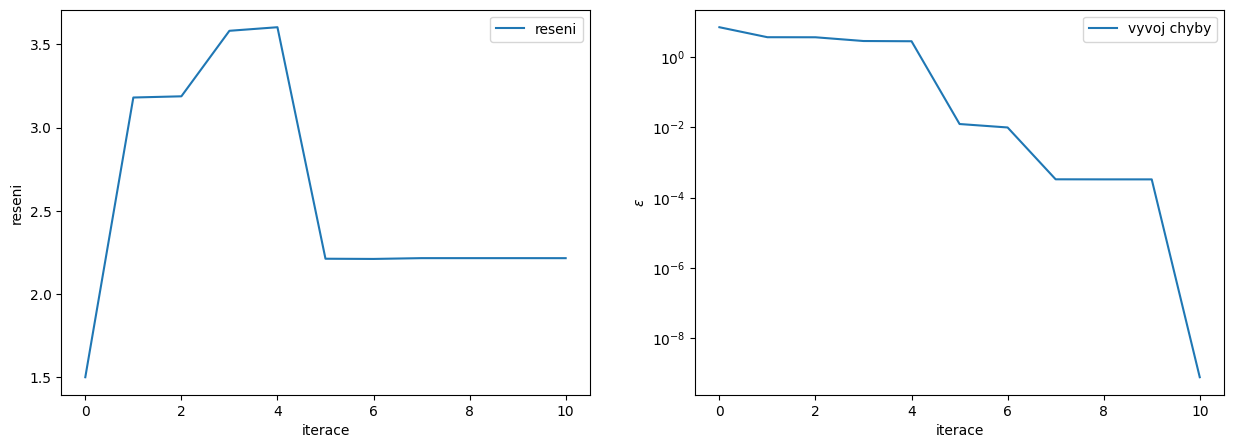

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci2),reseni2,label='reseni')
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci2),epsilon2,label='vyvoj chyby')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].set_yscale('log')
ax[1].legend();

### Metoda největšího spádu (Gradient descent)

Jedna z metod využívající znalosti derivace funkce je Metoda největšího spádu. Tato metoda má výhodu, že je poměrně jednoduchá, zato obsahuje jeden volný parametr, který je potřeba nastavit v praxi ručně na základě řešeného problému. Metoda tedy nefunguje obecně. 

Postup metody:
1. vygenerujeme náhodný bod $a_0$
2. v bodě $a$ spočítáme derivaci $f^{\prime}(a_{n})$
3. provedeme krok směrem *nejvetšího spádu*: $a_{n+1} = a_{n} - \alpha f^{\prime}(a_n)$

Problém spočívá ve volbě kroku $\alpha$. Pokud zvolíme příliš malý krok, metoda bude konvergovat pomalu. Naopak pokud zvolíme příliš velký krok, metoda bude divergovat - "přeskočíme" minimum a budeme od něj čím dál více odskakovat.


Vlastnosti metody:
* jednoduchá implementace
* nutné zvolit vhodný koeficient $\alpha$
* pomalá konvergence v určitých případech (viz přednáška a další sekce)
* přesto se používá (v několika modifikacemi) např. při optimalizaci některých Neuronových sítí !

**Algoritmus metody největšího spádu**

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Implementujte metodu *největšího spádu* doplněním následujícího kódu.

Do pole `reseni3` uložte vždy aktuální řešení a do pole `epsilon3` odpovídající chybu v každé iteraci.
<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #00843F; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #D6ECE1; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Tip</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Metodu je možné zlepšit postupným snižování hodnoty koeficientu $\alpha$ v každé iteraci. Například pomocí `alpha *= 0.9`.
</p>
</div>
</div>

</p>
</div>
</div>

In [ ]:
def df(x, h):
    return (f(x + h) - f(x)) / h

# nastavme presnost, se kterou chceme nalezt minimum
presnost = 1e-15 # ZKUSIT ZMENSIT NA 1e-15

# pocatecni bod
a0 = -4
a = a0

alpha = 0.5
maxIteraci = 100

# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon3 = [] # odhad chyby, tedy delku intervalu <a,c> v jednotlivych krocich
reseni3 = [] # aktualni odhad reseni

# hledani probiha v cyklu
while True:
    if len(reseni3) >= maxIteraci: # skoncime, pokud je minimum urceno dostatecne presne nebo hodne iteraci
        break
    
    alpha *= 0.9  # vylepšení metody - zmenšování kroku
    
    der = df(a, 0.01)
    
    a = a - alpha * der  # krok metody
    
    epsilon3.append(np.abs(der))
    reseni3.append(a)
    
    if np.abs(der) < presnost:
        break

minimum3 = reseni3[-1] # odhad konecneho reseni
chyba3 = epsilon3[-1] # odhad konecne chyby

iteraci3 = len(reseni3)

Porovnání s výsledkem funkce `minimize(.., method="CG")` z knihovny SciPy:

In [15]:
min_SP3 = optimize.minimize(f, x0=a0, method="CG").x[0]

In [16]:
print("minimum:", minimum3, "chyba:", chyba3, "iteraci:", len(reseni3))
print("minimum(SciPy):", min_SP3)

minimum: 2.2103001275872014 chyba: 1.8740564655672642e-11 iteraci: 100
minimum(SciPy): 2.2153014120768595


In [17]:
print('Zlatý řez:    ', minimum, chyba, iteraci)  # predchozi vysledek
print('Parabola :    ', minimum2, chyba2, iteraci2)
print('Grad. des.:   ', minimum3, chyba3, iteraci3)

Zlatý řez:     2.2153014081899687 8.881784197001252e-16 76
Parabola :     2.2153014127787602 7.81929188065078e-10 11
Grad. des.:    2.2103001275872014 1.8740564655672642e-11 100


**Vizualizace nalezeného extrému**

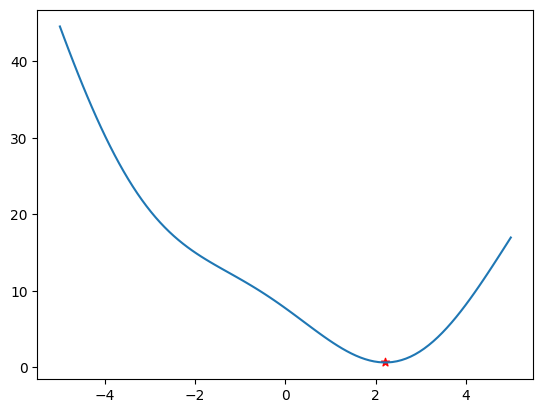

In [18]:
plt.plot(x, f(x))
plt.scatter([a], [f(a)], c='r', marker='*');

**Analýza konvergence**

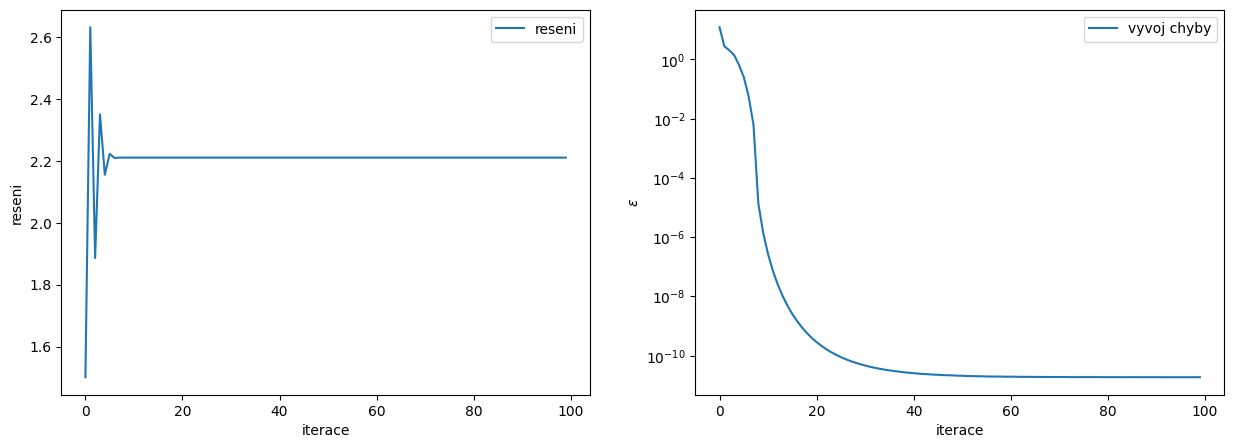

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci3),reseni3,label='reseni')
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci3),epsilon3,label='vyvoj chyby')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].set_yscale('log')
ax[1].legend();

### Srovnání konvergencí

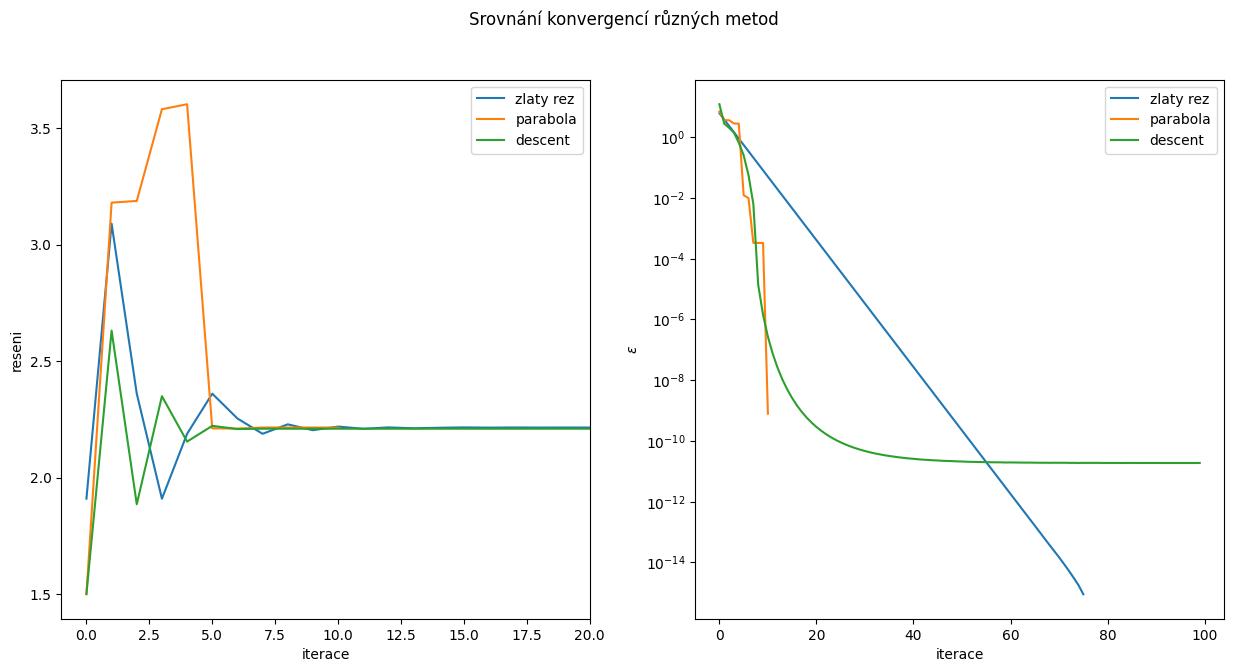

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
fig.suptitle('Srovnání konvergencí různých metod')

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci),reseni,label='zlaty rez')
ax[0].plot(range(iteraci2),reseni2,label='parabola')
ax[0].plot(range(iteraci3),reseni3,label='descent')
ax[0].set_xlim([-1, 20])
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci),epsilon,label='zlaty rez')
ax[1].plot(range(iteraci2),epsilon2,label='parabola')
ax[1].plot(range(iteraci3),epsilon3,label='descent')
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].legend();

## Hledání extrémů funkce více proměnných

Optimalizace ve více rozměrném prostoru je o řád komplikovanější. Na přednášce bylo představeno několik metod, které efektivně hledají minimum. Zde se podíváme jen na *Metodu největšího spádu* a na *Metodu konjugovaných gradientů*.

### Metoda největšího spádu nD (Gradient descent)

Pro hledání minima funkcí více proměnných můžeme opět využít jednoduchou metodu největšího spádu. Zde se ovšem významněji projeví pomalá konvergence kvůli geometrii terénu. To lze ilustrovat například na **banánové funkci** ([Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function)):

$$
f(x, y) = (1 - x)^2 + 100 (y - x^2)^2
$$

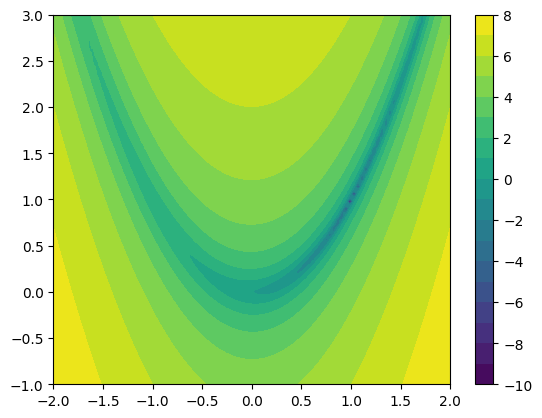

In [21]:
def f2(X):
    x, y = X
    return (1 - x)**2 + 100*(y - x**2)**2

osa_x = np.linspace(-2, 2, 100)
osa_y = np.linspace(-1, 3, 100)
(x,y) = np.meshgrid(osa_x, osa_y)

z = np.log(f2((x, y)))

plt.contourf(x, y, z, levels=20)
plt.colorbar();
#plt.contour(x, y, z, levels=10, colors='w');

**Algoritmus metody největšího spádu nD**

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Implementujte metodu *největšího spádu nD* doplněním následujícího kódu.

Do pole `reseni3` uložte vždy aktuální řešení a do pole `epsilon3` odpovídající chybu v každé iteraci.
<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #00843F; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #D6ECE1; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Tip</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Metodu je možné zlepšit postupným snižování hodnoty koeficientu $\alpha$ v každé iteraci. Například pomocí `alpha *= 0.9`.
</p>
</div>
</div>

</p>
</div>
</div>

In [22]:
def df2(X, h):
    x, y = X
    return np.array([(f2((x + h, y)) - f2((x, y))) / h, (f2((x, y + h)) - f2((x, y))) / h])

# nastavme presnost, se kterou chceme nalezt minimum
presnost = 1e-4

# pocatecni bod
a0 = [-1.5, 0]
a = a0

alpha = 0.002
maxIteraci = 200

# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon4 = [] # odhad chyby, tedy delku intervalu <a,c> v jednotlivych krocich
reseni4 = [] # aktualni odhad reseni

der = df2(a, 0.01)
epsilon4.append(np.abs(der @ der))
reseni4.append(a)
    
# hledani probiha v cyklu
while True:
    if len(reseni4) >= maxIteraci: # skoncime, pokud je minimum urceno dostatecne presne nebo hodne iteraci
        break
    
    alpha *= 0.99  # vylepšení metody - zmenšování kroku
    
    der = df2(a, 0.00001)
    a = a - alpha * der  # krok metody
    
    epsilon4.append(np.sqrt(der @ der))
    reseni4.append(a)
    
    #print(a, der)
    
    if np.abs(der @ der) < presnost:
        break

minimum4 = reseni4[-1] # odhad konecneho reseni
chyba4 = epsilon4[-1] # odhad konecne chyby

iteraci4 = len(reseni4)

In [23]:
min_SP4 = optimize.minimize(f2, x0=a0, method="CG").x

In [24]:
print("minimum:", minimum4, "chyba:", chyba4, "iteraci:", len(reseni4))
print("minimum(SciPy):", min_SP4)

minimum: [0.94856431 0.89956834] chyba: 0.04540657540775302 iteraci: 200
minimum(SciPy): [0.99999546 0.99999091]


**Vizualizace nalezeného extrému**

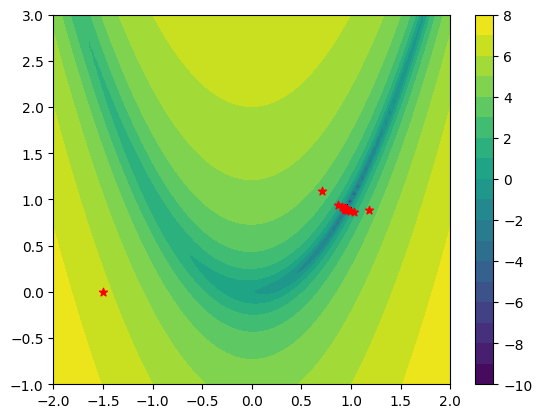

In [25]:
reseni4 = np.array(reseni4)

plt.contourf(x, y, z, levels=20)
plt.colorbar()
plt.scatter(reseni4[:,0], reseni4[:,1], c='r', marker='*');

**Analýza konvergence**

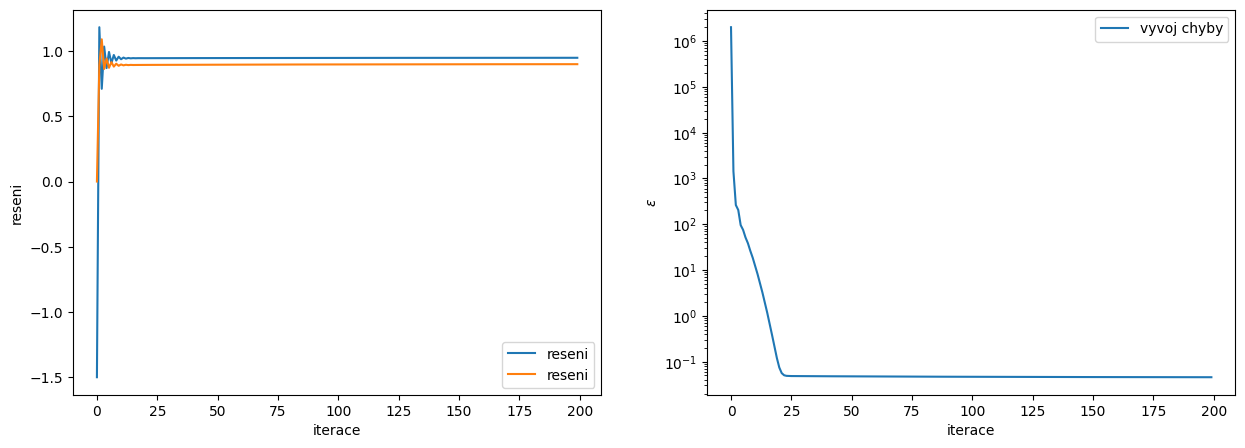

In [26]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci4),reseni4,label='reseni')
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci4),epsilon4,label='vyvoj chyby')
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].legend();

## Zápočtová úloha - Metoda konjugovaných gradientů

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol - zápočet 7</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

[ZDE](ukol7)
</p>
</div>
</div>